In [1]:
import numpy as np

In [2]:
# генерируем дискретную величину
np.random.randint(1, 5)

2

In [3]:
np.random.randint(1, 5, 10)

array([1, 4, 1, 2, 4, 3, 1, 4, 4, 2])

In [10]:
# генерируем непрерывную величину
np.random.random(10)

array([0.94237345, 0.47116627, 0.30605308, 0.64121227, 0.34697399,
       0.55536543, 0.50625323, 0.19118953, 0.32933841, 0.72268184])

In [14]:
np.random.uniform(1, 5)

3.5997068938891585

In [149]:
np.random.uniform(1, 5, 10)

array([3.41879142, 4.79124325, 3.94075836, 2.62405391, 4.17938791,
       3.37200719, 3.36789251, 3.68949939, 1.63571429, 4.46279203])

**Задача 1.** Оценить вероятность того, что на игральной кости выпадет больше 4 очков. Сравнить с теоретической вероятностью.

In [80]:
import numpy as np
# np.random.seed(None) #исходное состояние генератора случайных чисел. 
#Нужно задаьб любое число и цифры менятьмя не будут в рандом
#Фиксируем рандомные числа. Нужно для того, если очень много случайных чисел и чтобы постоянно не создавал их
trials = 1000   # Количество попыток
successes = 0    # Количество успехов

for i in range(trials):
    random_score = np.random.randint(1, 7)    # Случайное количество очков от 1 до 6
    if random_score > 4:
        successes += 1
#  Найдем частоту. Через нашу модель и через теоретический расчет   
p_monte_carlo = successes / trials    # Вероятность из моделирования
p = 2 / 6                             # Теоретическая вероятность

print(successes, trials, p_monte_carlo, p)
# Если мы увеличим до 1000 число попыток, то мы будем получать всегда одно и то же число до 1 знака после запятой.
# Чем больше попыток, тем ближе наша модель будет приблежаться к расчетой вероятности


308 1000 0.308 0.3333333333333333


**Задача 1А** (опциональная). Дан квадрат, в который вписан круг (касаясь сторон квадрата). В квадрат случайным образом попадают точки. Какова вероятность, что наугад взятая точка попадёт в круг?  
_Подсказка:_ Удобно взять квардат со стороной, равной 2, и отсчитывать координаты точек от его центра.

In [89]:
trials = 1000000
successes = 0

for i in range(trials):
    x = np.random.uniform(-1, 1) # круг  с центром находится  в точки 0 и сторона квадрата равна 1. Правая граница не входит 
    y = np.random.uniform(-1, 1) # круг  с центром находится  в точки 0 и сторона квадрата равна 1. Правая граница не входит 
    #корень из суммы квадрата меньше либо равен 1
    if x**2 + y**2 < 1:
        successes += 1

# Найдем частоту, что наша точка попадет в круг, который описан квадратом.
res = successes / trials
res

0.78555

In [85]:
res * 4 # число пи

3.14072

**Задача 2.** Смоделировать стрельбу по мишени.

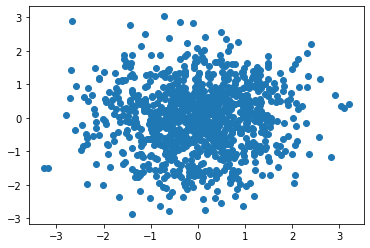

In [150]:
import matplotlib.pyplot as plt

shots = 1000    # Количество выстрелов
std_dev = 1 # Стандартное отклонение (на сколько мы в среднем будем мазать)

x = np.random.normal(0, std_dev, shots) # 0 - и среднее, и мода, и медиана
y = np.random.normal(0, std_dev, shots)


plt.scatter(x, y)
# почему разброс от -3 до 3? Это правило 3 сигма, что значение лежит 3сигма <= X <= 3сигма = 0,997
#Это значит, что 997 выстрелов будет лежать в интервале 3 сигма
#только 3 точки будут лежать за этими предалими 3сигма

**Задача 3.** Графически определить распределение измеренных значений физической величины, когда измерительный прибор имеет случайную погрешность.

In [151]:
import pandas as pd

data = pd.read_csv("data.log", sep=" ")["az"]
data.describe()

count    1040.000000
mean       -9.797112
std         0.087958
min       -10.030373
25%        -9.866481
50%        -9.800747
75%        -9.727398
max        -9.570811
Name: az, dtype: float64

<AxesSubplot:>

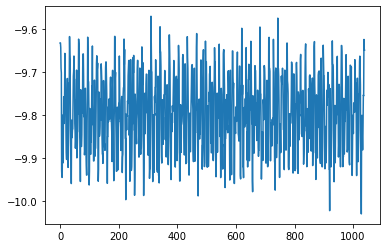

In [152]:
data.plot()

In [155]:
uni = np.random.uniform(min(data), max(data), 1000)
normal = np.random.normal(np.mean(data), np.std(data, ddof = 1), 10000)

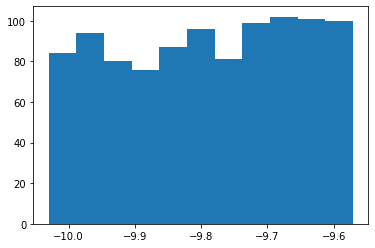

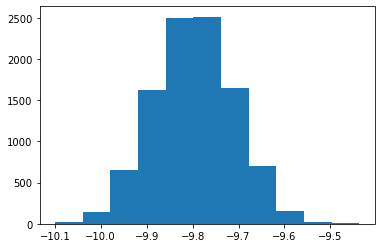

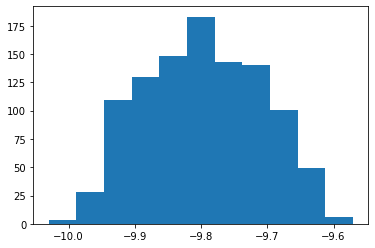

In [156]:
plt.hist(uni, bins=11) # равномерное распределение
plt.show()
plt.hist(normal, bins=11) # идеальное равномерное распределение
plt.show()
plt.hist(data, bins=11)  # наше распределение прибора
plt.show()

**Задача 4.** Рассчитать вероятность того, что пациент заражён COVID-19, если известно, что тест дал положительный результат. Сравнить с результатом моделирования.

In [162]:
prev = 0.10    # Распространённость болезни
sens = 0.97    # Чувствительность теста
spec = 0.90    # Специфичность теста

p = (sens * prev) / (sens * prev + (1 - spec) * (1 - prev))   # Теоретическая вероятность 
print(p)

0.5187165775401069


In [165]:
population = 100000    # Количество испытуемых

true_pos = 0    # Количество больных с положительным тестом
false_pos = 0   # Количество здоровых с положительным тестом

for i in range(population):
    # Наугад решаем, заражён ли человек
    # для этого генерируем случайную величину от 0 до 1     
    infected = np.random.uniform() < prev
    
    # Наугад решаем, дал ли тест положительный результат 
    positive = np.random.uniform() < sens if infected else np.random.uniform() < 1 - spec
    
    if positive:
        if infected:
            true_pos += 1
        else:
            false_pos += 1
            
p_monte_carlo = true_pos / (true_pos + false_pos)    # Вероятность из моделирования
print(p_monte_carlo)

0.5220962272149215
